In [1]:
!pip install tweepy

In [2]:
!pip install vaderSentiment

# TWEEPY


In [1]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
consumer_key = 'RPBBMjYPI14uwQXdp01v23F6q'
consumer_secret = 'KP3ZpUxF1oktO3v5wiORoUnMw6xqfUlO8aMRf0C9adh7HEYzoy'
access_token = '358138140-gb6M8yJZKiC6DET0vsiGaABOzevKwcONxPpohvIK'
access_token_secret = 'zmoj7nuoEMBjL8sjMRHvhhJpJ1cEKpkQgcwdCdXiE5mMa'

[1.8490000000000002, 64.418, 1.73, 0.06740000000000002]


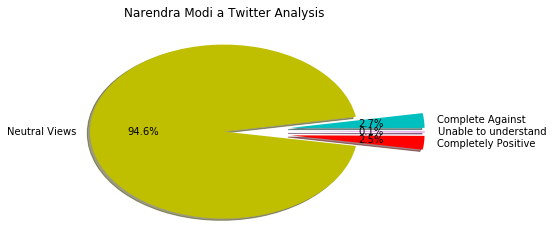

In [58]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

tweets = api.search('Narendra Modi', count=200)


data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

#display(data.head(10))


#print(tweets[0].created_at)

import nltk
#nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()


listy = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  listy.append(ss)
  
se = pd.Series(listy)
data['polarity'] = se.values

#print(data)
neg = []
neu = []
pos = []
compound = []
for i in range(0,data.shape[0]):
    neg.append(data['polarity'].loc[i]['neg'])
    neu.append(data['polarity'].loc[i]['neu'])
    pos.append(data['polarity'].loc[i]['pos'])
    compound.append(data['polarity'].loc[i]['compound'])
    
a=sum(neg)
b=sum(neu)
c=sum(pos)
d=sum(compound)
ll=[a,b,c,d]
print(ll)

import matplotlib.pyplot as plt
ll=[a,b,c,d]
categories = ['Complete Against','Neutral Views','Completely Positive','Unable to understand ']
cols=['c','y','r','m']
plt.pie(ll,labels=categories,colors=cols,shadow = True , explode = (0.5,0,0.5,0.5),autopct='%1.1f%%')
plt.title('Narendra Modi a Twitter Analysis')
plt.show()

In [56]:
data.shape[0]


67